# Lab 01 (Set Cover problem)

In [1]:
from random import random, seed
from itertools import product, accumulate
from matplotlib import pyplot as plt
import numpy as np

from icecream import ic
from tqdm import tqdm

## Initialization

In [2]:
class ProblemParam:
    """Define the parameters to generate a problem"""
    def __init__(self, us, ns, d):
        self.universe_size = us
        self.num_sets = ns
        self.density = d


istances = [
    ProblemParam(100, 10, 0.2),
    ProblemParam(1000, 100, 0.2),
    ProblemParam(10000, 1000, 0.2),
    ProblemParam(100000, 10000, 0.1),
    ProblemParam(100000, 10000, 0.2),
    ProblemParam(100000, 10000, 0.3)
]

In [3]:
class Problem:
    """
    Problem variables:
        sets : which set contains which item
        costs: how much each set costs 
    """
    def __init__(self, sets, costs):
        self.sets = sets
        self.costs = costs

In [4]:

def createProblem(prob_param):
    """Create a problem given the specifications"""
    SETS = np.random.random((prob_param.num_sets, prob_param.universe_size)) < prob_param.density
    for s in range(prob_param.universe_size):
        if not np.any(SETS[:, s]):
            SETS[np.random.randint(prob_param.num_sets), s] = True
    COSTS = np.pow(SETS.sum(axis=1), 1.1)
    return Problem(SETS, COSTS)

## Helper Functions

In [5]:
def valid(solution, problem):
    """Checks wether solution is valid (i.e. covers all universe)"""
    return np.all(np.logical_or.reduce(problem.sets[solution]))


def cost(solution, problem):
    """Returns the cost of a solution (to be minimized)"""
    return problem.costs[solution].sum()


def evaluate(solution, problem):
    """
    Returns the fitness of a solution (to be maximized).
    If the solution is invalid a score of (all_sets + 1) is given.
    """
    if valid(solution, problem):
        return -cost(solution, problem)
    else:
        return -(cost(np.full(len(solution), True), problem) + 1)

# Tweak functions

In [6]:
def tweak_prob(solution):
    """ One or more tweaks """
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < 0.5:
        index = np.random.randint(0, len(solution))
        new_solution[index] = not new_solution[index]
    return new_solution


def tweak_perc(solution, perc, max_perc=0.99):
    """ More tweaks later in the climb """
    if perc > max_perc:  # Clip it to avoid explosions
        perc = max_perc
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < (perc ** 2):
        index = np.random.randint(0, len(solution))
        new_solution[index] = not new_solution[index]
    return new_solution

# RMHC

In [7]:
MAX_STEPS = 1000  # TODO: increase to 10k or 100k

history = []
for i in istances:
    # Create the problem
    problem = createProblem(i)

    # Create the starting solution and evaluate it
    solution = np.full(i.num_sets, True)
    history.append([evaluate(solution, problem)])

    # Iterate to improve it
    for n in tqdm(range(MAX_STEPS)):
        new_solution = tweak_perc(solution, n / MAX_STEPS)
        history[-1].append(evaluate(new_solution, problem))
        if evaluate(new_solution, problem) > evaluate(solution, problem):
            solution = new_solution

    ic(i)
    ic(evaluate(solution, problem))
    ic(history[-1].index(evaluate(solution, problem)))

100%|██████████| 1000/1000 [00:00<00:00, 24054.60it/s]
ic| i: <__main__.ProblemParam object at 0x719ad02c3fa0>
ic| evaluate(solution, problem): np.float64(-286.7078421395446)
ic| history[-1].index(evaluate(solution, problem)): 0
100%|██████████| 1000/1000 [00:00<00:00, 20702.80it/s]
ic| i: <__main__.ProblemParam object at 0x719ad02c2b90>
ic| evaluate(solution, problem): np.float64(-7624.548201874337)
ic| history[-1].index(evaluate(solution, problem)): 184
100%|██████████| 1000/1000 [00:02<00:00, 403.32it/s]
ic| i: <__main__.ProblemParam object at 0x719ad02c3640>
ic| evaluate(solution, problem): np.float64(-1523294.3255594452)
ic| history[-1].index(evaluate(solution, problem)): 994
100%|██████████| 1000/1000 [37:25<00:00,  2.25s/it]
ic| i: <__main__.ProblemParam object at 0x719ad02c38e0>
ic| evaluate(solution, problem): np.float64(-187822655.3738125)
ic| history[-1].index(evaluate(solution, problem)): 1000
100%|██████████| 1000/1000 [43:05<00:00,  2.59s/it]
ic| i: <__main__.ProblemParam

# Plot

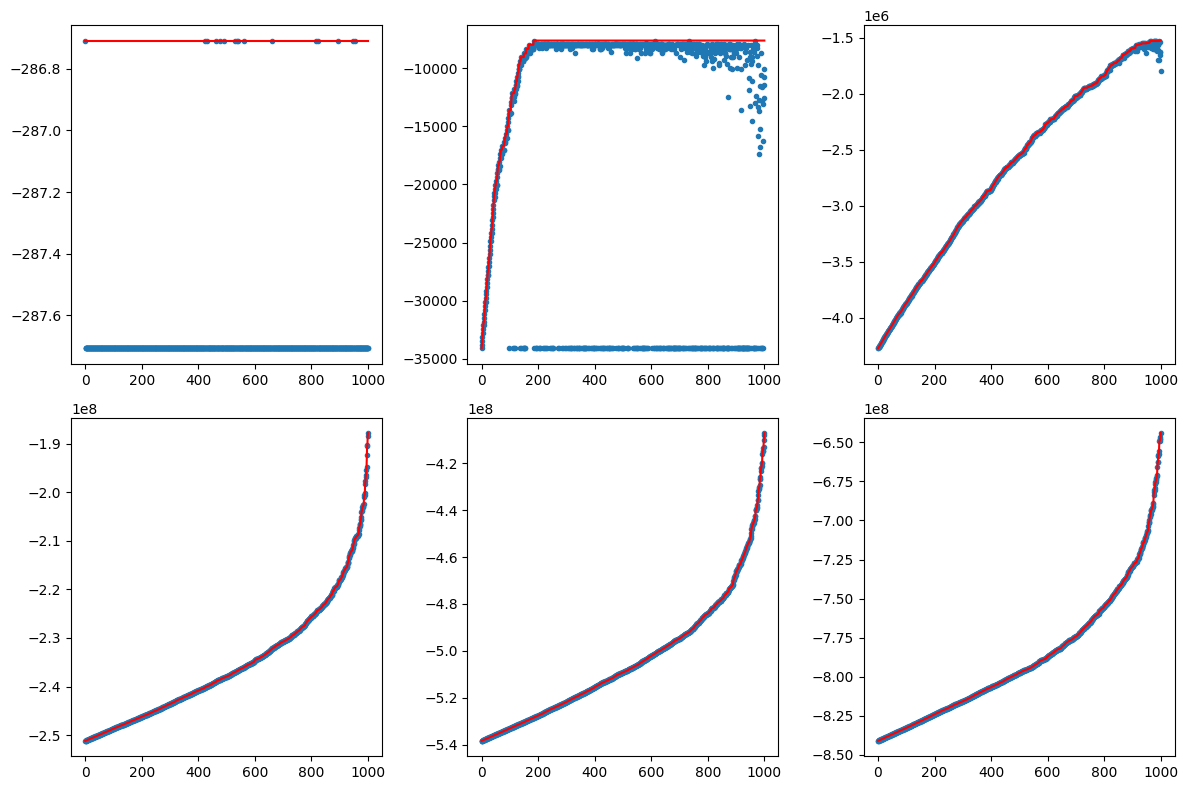

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

for a, h in zip(axs, history):
    a.plot(
        range(len(h)),
        list(accumulate(h, max)),
        color="red",
    )
    a.scatter(range(len(h)), h, marker=".")

plt.tight_layout()
plt.show()